In [1]:
import pandas as pd
import numpy as np
import sqlite3 as sql
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as scipy
from scipy import stats
import warnings

%matplotlib inline
%reload_ext autoreload
%autoreload 2
plt.style.use("seaborn-v0_8-paper")

pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 100)

warnings.filterwarnings("ignore")

## Data Cleaning

In [2]:
df_activity = pd.read_csv(r"C:\Users\Aiza\OneDrive\Documents\Portfolio\Airline Loyalty Program\Customer Flight Activity.csv")

In [3]:
df_signups = pd.read_csv(r"C:\Users\Aiza\OneDrive\Documents\Portfolio\Airline Loyalty Program\Customer Loyalty History.csv")

### Cleaning *signups* table

In [4]:
df_signups.head()

,Loyalty Number,Country,Province,City,Postal Code,Gender,Education,Salary,Marital Status,Loyalty Card,CLV,Enrollment Type,Enrollment Year,Enrollment Month,Cancellation Year,Cancellation Month
0,480934,Canada,Ontario,Toronto,M2Z 4K1,Female,Bachelor,83236.0,Married,Star,3839.14,Standard,2016,2,NaN,NaN
1,549612,Canada,Alberta,Edmonton,T3G 6Y6,Male,College,NaN,Divorced,Star,3839.61,Standard,2016,3,NaN,NaN
2,429460,Canada,British Columbia,Vancouver,V6E 3D9,Male,College,NaN,Single,Star,3839.75,Standard,2014,7,2018.0,1.0
3,608370,Canada,Ontario,Toronto,P1W 1K4,Male,College,NaN,Single,Star,3839.75,Standard,2013,2,NaN,NaN
4,530508,Canada,Quebec,Hull,J8Y 3Z5,Male,Bachelor,103495.0,Married,Star,3842.79,Standard,2014,10,NaN,NaN


In [5]:
df_signups.drop_duplicates(inplace=True)

In [6]:
df_signups.nunique()

Loyalty Number        16737
Country                   1
Province                 11
City                     29
Postal Code              55
Gender                    2
Education                 5
Salary                 5890
Marital Status            3
Loyalty Card              3
CLV                    7984
Enrollment Type           2
Enrollment Year           7
Enrollment Month         12
Cancellation Year         6
Cancellation Month       12
dtype: int64

In [7]:
for col in list(df_signups.columns):
    print(f"{col} -> {df_signups[col].unique()}")

Loyalty Number -> [480934 549612 429460 ... 776187 906428 652627]
Country -> ['Canada']
Province -> ['Ontario' 'Alberta' 'British Columbia' 'Quebec' 'Yukon' 'New Brunswick'
 'Manitoba' 'Nova Scotia' 'Saskatchewan' 'Newfoundland'
 'Prince Edward Island']
City -> ['Toronto' 'Edmonton' 'Vancouver' 'Hull' 'Whitehorse' 'Trenton' 'Montreal'
 'Dawson Creek' 'Quebec City' 'Fredericton' 'Ottawa' 'Tremblant' 'Calgary'
 'Thunder Bay' 'Whistler' 'Peace River' 'Winnipeg' 'Sudbury'
 'West Vancouver' 'Halifax' 'London' 'Regina' 'Kelowna' "St. John's"
 'Victoria' 'Kingston' 'Banff' 'Moncton' 'Charlottetown']
Postal Code -> ['M2Z 4K1' 'T3G 6Y6' 'V6E 3D9' 'P1W 1K4' 'J8Y 3Z5' 'Y2K 6R0' 'P5S 6R4'
 'K8V 4B2' 'H2Y 2W2' 'M8Y 4K8' 'U5I 4F1' 'G1B 3L5' 'H4G 3T4' 'M2M 7K8'
 'M2M 6J7' 'E3B 2H2' 'M1R 4K3' 'T9G 1W3' 'H2Y 4R4' 'V5R 1W3' 'P1L 8X8'
 'K1F 2R2' 'H5Y 2S9' 'V1E 4R6' 'H2T 2J6' 'T3E 2V9' 'H2T 9K8' 'K8T 5M5'
 'V6T 1Y8' 'P2T 6G3' 'T9O 2W2' 'V6E 3Z3' 'R6Y 4T5' 'M5V 1G5' 'V6V 8Z3'
 'B3J 9S2' 'M5B 3E4' 'R2C 0M5'

In [8]:
#College and Bachelors are the same:
df_signups["Education"]=np.where(df_signups["Education"]=="College","Bachelor",df_signups["Education"])

In [9]:
#Completing NFL's name
df_signups["Province"]=np.where(df_signups["Province"]=="Newfoundland","Newfoundland and Labrador",df_signups["Province"])

In [10]:
for col in list(df_signups.columns):
    print(f"{col} -> {df_signups[col].unique()}")

Loyalty Number -> [480934 549612 429460 ... 776187 906428 652627]
Country -> ['Canada']
Province -> ['Ontario' 'Alberta' 'British Columbia' 'Quebec' 'Yukon' 'New Brunswick'
 'Manitoba' 'Nova Scotia' 'Saskatchewan' 'Newfoundland and Labrador'
 'Prince Edward Island']
City -> ['Toronto' 'Edmonton' 'Vancouver' 'Hull' 'Whitehorse' 'Trenton' 'Montreal'
 'Dawson Creek' 'Quebec City' 'Fredericton' 'Ottawa' 'Tremblant' 'Calgary'
 'Thunder Bay' 'Whistler' 'Peace River' 'Winnipeg' 'Sudbury'
 'West Vancouver' 'Halifax' 'London' 'Regina' 'Kelowna' "St. John's"
 'Victoria' 'Kingston' 'Banff' 'Moncton' 'Charlottetown']
Postal Code -> ['M2Z 4K1' 'T3G 6Y6' 'V6E 3D9' 'P1W 1K4' 'J8Y 3Z5' 'Y2K 6R0' 'P5S 6R4'
 'K8V 4B2' 'H2Y 2W2' 'M8Y 4K8' 'U5I 4F1' 'G1B 3L5' 'H4G 3T4' 'M2M 7K8'
 'M2M 6J7' 'E3B 2H2' 'M1R 4K3' 'T9G 1W3' 'H2Y 4R4' 'V5R 1W3' 'P1L 8X8'
 'K1F 2R2' 'H5Y 2S9' 'V1E 4R6' 'H2T 2J6' 'T3E 2V9' 'H2T 9K8' 'K8T 5M5'
 'V6T 1Y8' 'P2T 6G3' 'T9O 2W2' 'V6E 3Z3' 'R6Y 4T5' 'M5V 1G5' 'V6V 8Z3'
 'B3J 9S2' 'M5B 3

In [11]:
#Checking Salary and CLV
df_signups[["Salary", "CLV"]].describe()

,Salary,CLV
count,12499.000000,16737.000000
mean,79245.609409,7988.896536
std,35008.297285,6860.982280
min,-58486.000000,1898.010000
25%,59246.500000,3980.840000
50%,73455.000000,5780.180000
75%,88517.500000,8940.580000
max,407228.000000,83325.380000


It's impossible to have negative salary!

In [12]:
df_signups[df_signups["Salary"] < 0]

,Loyalty Number,Country,Province,City,Postal Code,Gender,Education,Salary,Marital Status,Loyalty Card,CLV,Enrollment Type,Enrollment Year,Enrollment Month,Cancellation Year,Cancellation Month
1082,542976,Canada,Quebec,Montreal,H2Y 4R4,Male,High School or Below,-49830.0,Divorced,Star,24127.50,2018 Promotion,2018,3,NaN,NaN
1894,959977,Canada,British Columbia,Vancouver,V5R 1W3,Female,Bachelor,-12497.0,Married,Aurora,9453.00,2018 Promotion,2018,3,NaN,NaN
2471,232755,Canada,British Columbia,Vancouver,V1E 4R6,Female,Bachelor,-46683.0,Single,Nova,4787.81,2018 Promotion,2018,3,NaN,NaN
3575,525245,Canada,British Columbia,Victoria,V10 6T5,Male,Bachelor,-45962.0,Married,Star,2402.33,2018 Promotion,2018,3,NaN,NaN
3932,603070,Canada,British Columbia,West Vancouver,V6V 8Z3,Female,Bachelor,-19325.0,Single,Star,2893.74,2018 Promotion,2018,3,NaN,NaN
4712,491242,Canada,British Columbia,Dawson Creek,U5I 4F1,Male,Bachelor,-43234.0,Married,Star,7597.91,2018 Promotion,2018,3,NaN,NaN
6560,115505,Canada,Newfoundland and Labrador,St. John's,A1C 6H9,Male,Bachelor,-10605.0,Married,Nova,5860.17,2018 Promotion,2018,4,NaN,NaN
6570,430398,Canada,Newfoundland and Labrador,St. John's,A1C 6H9,Male,Bachelor,-17534.0,Married,Nova,49423.80,2018 Promotion,2018,3,NaN,NaN
7373,152016,Canada,Ontario,Toronto,P1J 8T7,Female,Bachelor,-58486.0,Married,Aurora,5067.21,2018 Promotion,2018,2,NaN,NaN
8576,194065,Canada,Ontario,Sudbury,M5V 1G5,Female,Bachelor,-31911.0,Married,Nova,2888.85,2018 Promotion,2018,2,NaN,NaN


In [13]:
len(df_signups[df_signups["Salary"] < 0])

20

In [14]:
df_signups["Salary"]=abs(df_signups["Salary"])

In [15]:
#removed negative values
df_signups[["Salary", "CLV"]].describe()

,Salary,CLV
count,12499.000000,16737.000000
mean,79359.340907,7988.896536
std,34749.691464,6860.982280
min,9081.000000,1898.010000
25%,59246.500000,3980.840000
50%,73455.000000,5780.180000
75%,88517.500000,8940.580000
max,407228.000000,83325.380000


In [16]:
#checking for na values in the df
df_signups[df_signups.isna().any(axis=1)]

,Loyalty Number,Country,Province,City,Postal Code,Gender,Education,Salary,Marital Status,Loyalty Card,CLV,Enrollment Type,Enrollment Year,Enrollment Month,Cancellation Year,Cancellation Month
0,480934,Canada,Ontario,Toronto,M2Z 4K1,Female,Bachelor,83236.0,Married,Star,3839.14,Standard,2016,2,NaN,NaN
1,549612,Canada,Alberta,Edmonton,T3G 6Y6,Male,Bachelor,NaN,Divorced,Star,3839.61,Standard,2016,3,NaN,NaN
2,429460,Canada,British Columbia,Vancouver,V6E 3D9,Male,Bachelor,NaN,Single,Star,3839.75,Standard,2014,7,2018.0,1.0
3,608370,Canada,Ontario,Toronto,P1W 1K4,Male,Bachelor,NaN,Single,Star,3839.75,Standard,2013,2,NaN,NaN
4,530508,Canada,Quebec,Hull,J8Y 3Z5,Male,Bachelor,103495.0,Married,Star,3842.79,Standard,2014,10,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16731,900501,Canada,Ontario,Sudbury,M5V 1G5,Male,Bachelor,NaN,Single,Star,61134.68,Standard,2012,9,NaN,NaN
16732,823768,Canada,British Columbia,Vancouver,V6E 3Z3,Female,Bachelor,NaN,Married,Star,61850.19,Standard,2012,12,NaN,NaN
16733,680886,Canada,Saskatchewan,Regina,S1J 3C5,Female,Bachelor,89210.0,Married,Star,67907.27,Standard,2014,9,NaN,NaN
16734,776187,Canada,British Columbia,Vancouver,V5R 1W3,Male,Bachelor,NaN,Single,Star,74228.52,Standard,2014,3,NaN,NaN


In [17]:
df_signups[df_signups["Salary"].isna()==True]

,Loyalty Number,Country,Province,City,Postal Code,Gender,Education,Salary,Marital Status,Loyalty Card,CLV,Enrollment Type,Enrollment Year,Enrollment Month,Cancellation Year,Cancellation Month
1,549612,Canada,Alberta,Edmonton,T3G 6Y6,Male,Bachelor,NaN,Divorced,Star,3839.61,Standard,2016,3,NaN,NaN
2,429460,Canada,British Columbia,Vancouver,V6E 3D9,Male,Bachelor,NaN,Single,Star,3839.75,Standard,2014,7,2018.0,1.0
3,608370,Canada,Ontario,Toronto,P1W 1K4,Male,Bachelor,NaN,Single,Star,3839.75,Standard,2013,2,NaN,NaN
6,927943,Canada,Ontario,Toronto,P5S 6R4,Female,Bachelor,NaN,Single,Star,3857.95,Standard,2014,6,NaN,NaN
13,988178,Canada,Quebec,Montreal,H4G 3T4,Male,Bachelor,NaN,Single,Star,3871.07,Standard,2013,10,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16721,632951,Canada,Alberta,Edmonton,T9G 1W3,Female,Bachelor,NaN,Married,Star,44771.30,Standard,2018,7,NaN,NaN
16727,546773,Canada,British Columbia,Vancouver,V6E 3D9,Male,Bachelor,NaN,Married,Star,52811.49,Standard,2015,9,NaN,NaN
16731,900501,Canada,Ontario,Sudbury,M5V 1G5,Male,Bachelor,NaN,Single,Star,61134.68,Standard,2012,9,NaN,NaN
16732,823768,Canada,British Columbia,Vancouver,V6E 3Z3,Female,Bachelor,NaN,Married,Star,61850.19,Standard,2012,12,NaN,NaN



There are a lot of na values for Salary, but since we can't be sure the exact amount of each user, we will just leave it be.

In [18]:
#creating enrollment year-month columns
df_signups["Enrollment Year-Month"]=pd.to_datetime(df_signups["Enrollment Year"].astype(str) +  df_signups["Enrollment Month"].astype(str), format="%Y%m")

In [19]:
#creating temp cancellation df and cancellation year-month columns
df_sign_cancel=df_signups.dropna(subset=["Cancellation Year"])

In [20]:
df_sign_cancel["Cancellation Year-Month"]=pd.to_datetime(df_sign_cancel["Cancellation Year"].astype(int).astype(str) +  df_sign_cancel["Cancellation Month"].astype(int).astype(str), format="%Y%m")

In [21]:
#merging signups and cancel df
df_signups=df_signups.merge(df_sign_cancel[["Loyalty Number", "Cancellation Year-Month"]], on="Loyalty Number", how="left")

In [22]:
#final signups df
df_signups.head(10)

,Loyalty Number,Country,Province,City,Postal Code,Gender,Education,Salary,Marital Status,Loyalty Card,CLV,Enrollment Type,Enrollment Year,Enrollment Month,Cancellation Year,Cancellation Month,Enrollment Year-Month,Cancellation Year-Month
0,480934,Canada,Ontario,Toronto,M2Z 4K1,Female,Bachelor,83236.0,Married,Star,3839.14,Standard,2016,2,NaN,NaN,2016-02-01,NaT
1,549612,Canada,Alberta,Edmonton,T3G 6Y6,Male,Bachelor,NaN,Divorced,Star,3839.61,Standard,2016,3,NaN,NaN,2016-03-01,NaT
2,429460,Canada,British Columbia,Vancouver,V6E 3D9,Male,Bachelor,NaN,Single,Star,3839.75,Standard,2014,7,2018.0,1.0,2014-07-01,2018-01-01
3,608370,Canada,Ontario,Toronto,P1W 1K4,Male,Bachelor,NaN,Single,Star,3839.75,Standard,2013,2,NaN,NaN,2013-02-01,NaT
4,530508,Canada,Quebec,Hull,J8Y 3Z5,Male,Bachelor,103495.0,Married,Star,3842.79,Standard,2014,10,NaN,NaN,2014-10-01,NaT
5,193662,Canada,Yukon,Whitehorse,Y2K 6R0,Male,Bachelor,51124.0,Married,Star,3844.57,Standard,2012,5,NaN,NaN,2012-05-01,NaT
6,927943,Canada,Ontario,Toronto,P5S 6R4,Female,Bachelor,NaN,Single,Star,3857.95,Standard,2014,6,NaN,NaN,2014-06-01,NaT
7,188893,Canada,Ontario,Trenton,K8V 4B2,Male,Bachelor,100159.0,Married,Star,3861.49,Standard,2016,12,NaN,NaN,2016-12-01,NaT
8,852392,Canada,Quebec,Montreal,H2Y 2W2,Female,Bachelor,100159.0,Married,Star,3861.49,Standard,2015,5,NaN,NaN,2015-05-01,NaT
9,866307,Canada,Ontario,Toronto,M8Y 4K8,Male,Bachelor,100159.0,Married,Star,3861.49,Standard,2016,10,NaN,NaN,2016-10-01,NaT


### Cleaning *activity* table

In [23]:
df_activity.head()

,Loyalty Number,Year,Month,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed
0,100590,2018,6,12,15276,22914.0,0,0
1,100590,2018,7,12,9168,13752.0,0,0
2,100590,2018,5,4,6504,9756.0,0,0
3,100590,2018,10,0,0,0.0,512,92
4,100590,2018,2,0,0,0.0,0,0


drop duplicates and columns with only 0 values

In [24]:
df_activity.drop_duplicates(inplace=True)

In [25]:
len(df_activity)

391014

In [26]:
#removing cells with only 0 values
df_activity=df_activity[(df_activity["Total Flights"] > 0) | (df_activity["Distance"] > 0) | (df_activity["Points Accumulated"] > 0) | (df_activity["Points Redeemed"] > 0) | (df_activity["Dollar Cost Points Redeemed"] > 0)]

In [27]:
len(df_activity)

181762

In [28]:
#creating activity year-month columns
df_activity["Activity Year-Month"]=pd.to_datetime(df_activity["Year"].astype(str) +  df_activity["Month"].astype(str), format="%Y%m")

In [29]:
#checking if activity records are before their enrollment date:
df_activity=pd.merge(df_activity,df_signups[["Loyalty Number", "Enrollment Year-Month", "Enrollment Type"]], on="Loyalty Number", how="left")

In [30]:
df_activity["DateDif_Act_Signup"]=12 * (df_activity["Activity Year-Month"].dt.year - df_activity["Enrollment Year-Month"].dt.year) + (df_activity["Activity Year-Month"].dt.month - df_activity["Enrollment Year-Month"].dt.month)

<Axes: xlabel='DateDif_Act_Signup', ylabel='Density'>

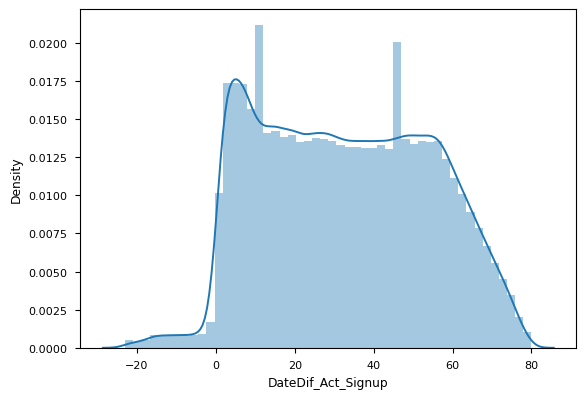

In [31]:
#checking if there are negative values - activity records before enrollment date
sns.distplot(df_activity["DateDif_Act_Signup"])

In [32]:
#removing negative records
df_error=df_activity[df_activity["Activity Year-Month"] < df_activity["Enrollment Year-Month"]]

In [33]:
df_error_index=df_error.index
df_error_index

Index([    45,    136,    150,    156,    180,    213,    221,    222,    246,
          254,
       ...
       181446, 181466, 181467, 181525, 181526, 181654, 181680, 181681, 181690,
       181700],
      dtype='int64', length=3298)

In [34]:
df_activity.drop(df_error_index, inplace=True)

In [35]:
df_activity.drop(['DateDif_Act_Signup','Enrollment Year-Month', 'Enrollment Type'], axis=1, inplace=True)

In [36]:
df_activity=df_activity[['Loyalty Number', 'Year', 'Month', 'Activity Year-Month','Total Flights', 'Distance',
       'Points Accumulated', 'Points Redeemed', 'Dollar Cost Points Redeemed',
       ]]

In [37]:
df_activity.head(10)

,Loyalty Number,Year,Month,Activity Year-Month,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed
0,100590,2018,6,2018-06-01,12,15276,22914.0,0,0
1,100590,2018,7,2018-07-01,12,9168,13752.0,0,0
2,100590,2018,5,2018-05-01,4,6504,9756.0,0,0
3,100590,2018,10,2018-10-01,0,0,0.0,512,92
4,102376,2018,6,2018-06-01,24,21216,31824.0,0,0
5,102376,2018,12,2018-12-01,15,16500,24750.0,556,100
6,102376,2018,7,2018-07-01,12,25080,37620.0,0,0
7,102376,2018,8,2018-08-01,12,6360,9540.0,0,0
8,102376,2018,9,2018-09-01,6,7452,11178.0,0,0
9,102376,2018,5,2018-05-01,4,2972,4458.0,0,0


In [38]:
#renaming signups columns for db
df_signups.rename(
    columns={
        'Loyalty Number': 'id',
        'Country': 'country',
        'Province': 'province',
        'City': 'city',
        'Postal Code': 'postal_code',
        'Gender': 'gender',
        'Education': 'education',
        'Salary': 'salary',
        'Marital Status': 'marital_status',
        'Loyalty Card': 'loyalty_card',
        'CLV': 'clv',
        'Enrollment Type': 'enrollment_type',
        'Enrollment Year': 'enrollment_year',
        'Enrollment Month': 'enrollment_month',
        'Cancellation Year': 'cancellation_year',
        'Cancellation Month': 'cancellation_month',
        'Enrollment Year-Month': 'enrollment_date',
        'Cancellation Year-Month': 'cancellation_date'},
    inplace=True
                 )

In [39]:
#renaming activity columns for db
df_activity.rename(
    columns={
        'Loyalty Number': 'signup_id',
        'Year': 'year',
        'Month': 'month',
        'Activity Year-Month': 'activity_date',
        'Total Flights': 'total_flights',
        'Distance': 'distance',
        'Points Accumulated': 'points_accumulated',
        'Points Redeemed': 'points_redeemed',
        'Dollar Cost Points Redeemed': 'dollar_cost_points_redeemed'
        },
    inplace=True
                 )

## Creating db file and tables

In [40]:
conn=sql.connect("nla_flights.db")
cur=conn.cursor()

In [41]:
#Creating signups table:
query="""
DROP TABLE IF EXISTS signups
"""
cur.execute(query)
conn.commit()


query="""
CREATE TABLE signups (
    id INT PRIMARY KEY NOT NULL,
    country VARCHAR(25) NOT NULL,
    province VARCHAR(50) NOT NULL,
    city VARCHAR(50) NOT NULL,
    postal_code VARCHAR(10) NULL,
    gender VARCHAR(10) NULL,
    education VARCHAR(10) NULL,
    salary FLOAT NULL,
    marital_status VARCHAR(15) NULL,
    loyalty_card VARCHAR(15) NULL,
    clv FLOAT NULL,
    enrollment_type VARCHAR(20) NOT NULL,
    enrollment_year INT NULL,
    enrollment_month INT NULL,
    cancellation_year INT NULL,
    cancellation_month INT NULL,
    enrollment_date DATE NULL,
    cancellation_date DATE NULL
);
"""

cur.execute(query)
conn.commit()

In [42]:
#Creating activity table:
query="""
DROP TABLE IF EXISTS activity
"""
cur.execute(query)
conn.commit()

query="""
CREATE TABLE activity (
    id INTEGER PRIMARY KEY AUTOINCREMENT,
    signup_id INT NOT NULL,
    year INT NULL,
    month INT NULL,
    activity_date DATE NULL,
    total_flights INT NULL,
    distance INT NULL,
    points_accumulated INT NULL,
    points_redeemed INT NULL,
    dollar_cost_points_redeemed INT NULL,
    FOREIGN KEY (signup_id) REFERENCES signups(id)
);
"""

cur.execute(query)
conn.commit()

In [43]:
#Inserting data to tables:
cur.execute("PRAGMA FOREIGN_KEYS=ON")

df_signups.to_sql(name="signups", con=conn, if_exists="append", index=False)
df_activity.to_sql(name="activity", con=conn, if_exists="append", index=False)

conn.commit()

In [44]:
query="""
SELECT
    name
FROM sqlite_master
WHERE type='table'
"""

df_tables=pd.read_sql_query(query, conn)

#get structure of all tables

lst_tbls=list(df_tables["name"])

for name in lst_tbls:
    query_st=f"""SELECT *
    FROM {name}
    """

    df_tbl = pd.read_sql_query(query_st, conn)
    
    print(f"-----\ntable: {name}\nno. of rows: {len(df_tbl)}\nunique values: {df_tbl.nunique()}")
    display(df_tbl.head(10))

-----
table: sqlite_sequence
no. of rows: 1
unique values: name    1
seq     1
dtype: int64


,name,seq
0,activity,178464


-----
table: signups
no. of rows: 16737
unique values: id                    16737
country                   1
province                 11
city                     29
postal_code              55
gender                    2
education                 4
salary                 5890
marital_status            3
loyalty_card              3
clv                    7984
enrollment_type           2
enrollment_year           7
enrollment_month         12
cancellation_year         6
cancellation_month       12
enrollment_date          81
cancellation_date        70
dtype: int64


,id,country,province,city,postal_code,gender,education,salary,marital_status,loyalty_card,clv,enrollment_type,enrollment_year,enrollment_month,cancellation_year,cancellation_month,enrollment_date,cancellation_date
0,480934,Canada,Ontario,Toronto,M2Z 4K1,Female,Bachelor,83236.0,Married,Star,3839.14,Standard,2016,2,NaN,NaN,2016-02-01 00:00:00,None
1,549612,Canada,Alberta,Edmonton,T3G 6Y6,Male,Bachelor,NaN,Divorced,Star,3839.61,Standard,2016,3,NaN,NaN,2016-03-01 00:00:00,None
2,429460,Canada,British Columbia,Vancouver,V6E 3D9,Male,Bachelor,NaN,Single,Star,3839.75,Standard,2014,7,2018.0,1.0,2014-07-01 00:00:00,2018-01-01 00:00:00
3,608370,Canada,Ontario,Toronto,P1W 1K4,Male,Bachelor,NaN,Single,Star,3839.75,Standard,2013,2,NaN,NaN,2013-02-01 00:00:00,None
4,530508,Canada,Quebec,Hull,J8Y 3Z5,Male,Bachelor,103495.0,Married,Star,3842.79,Standard,2014,10,NaN,NaN,2014-10-01 00:00:00,None
5,193662,Canada,Yukon,Whitehorse,Y2K 6R0,Male,Bachelor,51124.0,Married,Star,3844.57,Standard,2012,5,NaN,NaN,2012-05-01 00:00:00,None
6,927943,Canada,Ontario,Toronto,P5S 6R4,Female,Bachelor,NaN,Single,Star,3857.95,Standard,2014,6,NaN,NaN,2014-06-01 00:00:00,None
7,188893,Canada,Ontario,Trenton,K8V 4B2,Male,Bachelor,100159.0,Married,Star,3861.49,Standard,2016,12,NaN,NaN,2016-12-01 00:00:00,None
8,852392,Canada,Quebec,Montreal,H2Y 2W2,Female,Bachelor,100159.0,Married,Star,3861.49,Standard,2015,5,NaN,NaN,2015-05-01 00:00:00,None
9,866307,Canada,Ontario,Toronto,M8Y 4K8,Male,Bachelor,100159.0,Married,Star,3861.49,Standard,2016,10,NaN,NaN,2016-10-01 00:00:00,None


-----
table: activity
no. of rows: 178464
unique values: id                             178464
signup_id                       15128
year                                2
month                              12
activity_date                      24
total_flights                      17
distance                         9449
points_accumulated              10214
points_redeemed                   587
dollar_cost_points_redeemed       108
dtype: int64


,id,signup_id,year,month,activity_date,total_flights,distance,points_accumulated,points_redeemed,dollar_cost_points_redeemed
0,1,100590,2018,6,2018-06-01 00:00:00,12,15276,22914.0,0,0
1,2,100590,2018,7,2018-07-01 00:00:00,12,9168,13752.0,0,0
2,3,100590,2018,5,2018-05-01 00:00:00,4,6504,9756.0,0,0
3,4,100590,2018,10,2018-10-01 00:00:00,0,0,0.0,512,92
4,5,102376,2018,6,2018-06-01 00:00:00,24,21216,31824.0,0,0
5,6,102376,2018,12,2018-12-01 00:00:00,15,16500,24750.0,556,100
6,7,102376,2018,7,2018-07-01 00:00:00,12,25080,37620.0,0,0
7,8,102376,2018,8,2018-08-01 00:00:00,12,6360,9540.0,0,0
8,9,102376,2018,9,2018-09-01 00:00:00,6,7452,11178.0,0,0
9,10,102376,2018,5,2018-05-01 00:00:00,4,2972,4458.0,0,0


In [45]:
query="""
WITH cancellations AS (
SELECT
    cancellation_date AS date,
    COUNT(DISTINCT(id)) AS 'cancels'
FROM signups
GROUP BY cancellation_date
)

SELECT
    enrollment_year as 'year',
    enrollment_month as 'month',
    enrollment_date AS date,
    COUNT(DISTINCT(id)) AS 'signups',
    cancels,
    COUNT(DISTINCT(id)) - cancels AS 'net_signups'
FROM signups s
INNER JOIN cancellations c ON s.enrollment_date = c.date
GROUP BY enrollment_date
"""

df_monthly=pd.read_sql_query(query, conn)
df_monthly["date"]=pd.to_datetime(df_monthly["date"]).dt.strftime("%Y-%m")
df_monthly

,year,month,date,signups,cancels,net_signups
0,2013,1,2013-01,237,1,236
1,2013,2,2013-02,175,1,174
2,2013,4,2013-04,192,1,191
3,2013,6,2013-06,190,3,187
4,2013,7,2013-07,191,2,189
5,2013,8,2013-08,197,3,194
6,2013,9,2013-09,198,9,189
7,2013,10,2013-10,212,7,205
8,2013,11,2013-11,190,10,180
9,2013,12,2013-12,207,6,201


<Axes: xlabel='date', ylabel='signups'>

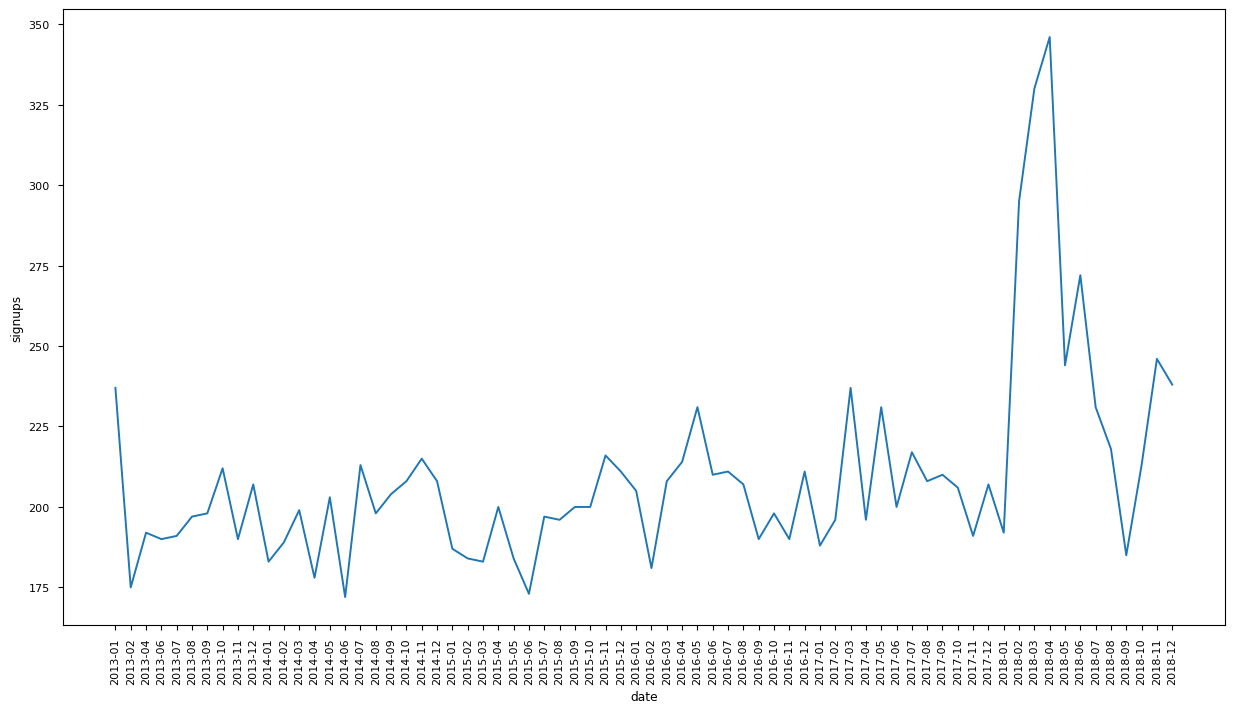

In [46]:
plt.figure(figsize=(15,8))
plt.xticks(rotation=90)
sns.lineplot(data=df_monthly, x="date", y="signups")

we see that there's an increase during the promotion period, but is this from the promo or random chance?

Let's use one-sample t-test. Pop mean=historical monthly signups

In [47]:
pop_mean=df_monthly[df_monthly["date"]<="2018-01-01"]["signups"].mean()

Checking for normality

<Axes: xlabel='signups', ylabel='Density'>

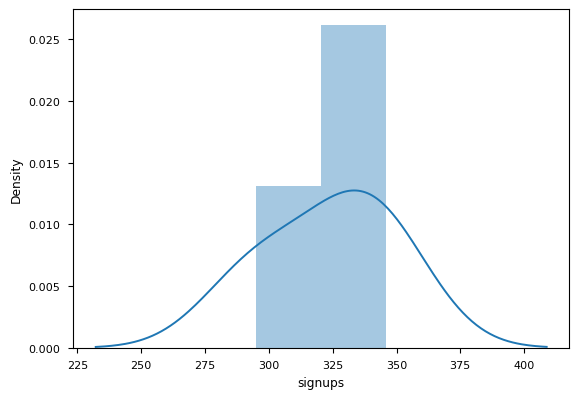

In [48]:
df_promo_s=df_monthly[(df_monthly["date"]>"2018-01-01") & (df_monthly["date"]<="2018-04-01")][["signups"]]
# df_promo_s["date"]=pd.to_datetime(df_promo_s["date"])
# df_promo_s.reset_index(drop=True, inplace=True)
# display(df_promo_s)

sns.distplot(df_promo_s["signups"])

((array([-0.81932862,  0.        ,  0.81932862]),
  array([295, 330, 346], dtype=int64)),
 (31.123043163289665, 323.6666666666667, 0.9776407723017847))

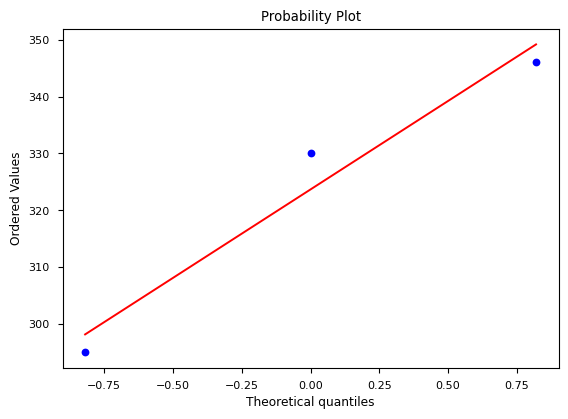

In [49]:
stats.probplot(df_promo_s["signups"],plot=plt)

In [50]:
stats.shapiro(df_promo_s["signups"])

ShapiroResult(statistic=0.9557814002037048, pvalue=0.5953703380724513)

Since p>=.05, we fail to reject the null hypothesis and treat the data as a normal.

In [51]:
stats.ttest_1samp(df_promo_s["signups"], pop_mean, alternative="greater")

TtestResult(statistic=8.18392790360462, pvalue=0.007302148505276001, df=2)

Since p<0.05, we reject the null hypothesis and conclude that the memberships for the promo period is greater than the historical average.

We look again at the net membership

<Axes: xlabel='date', ylabel='cancels'>

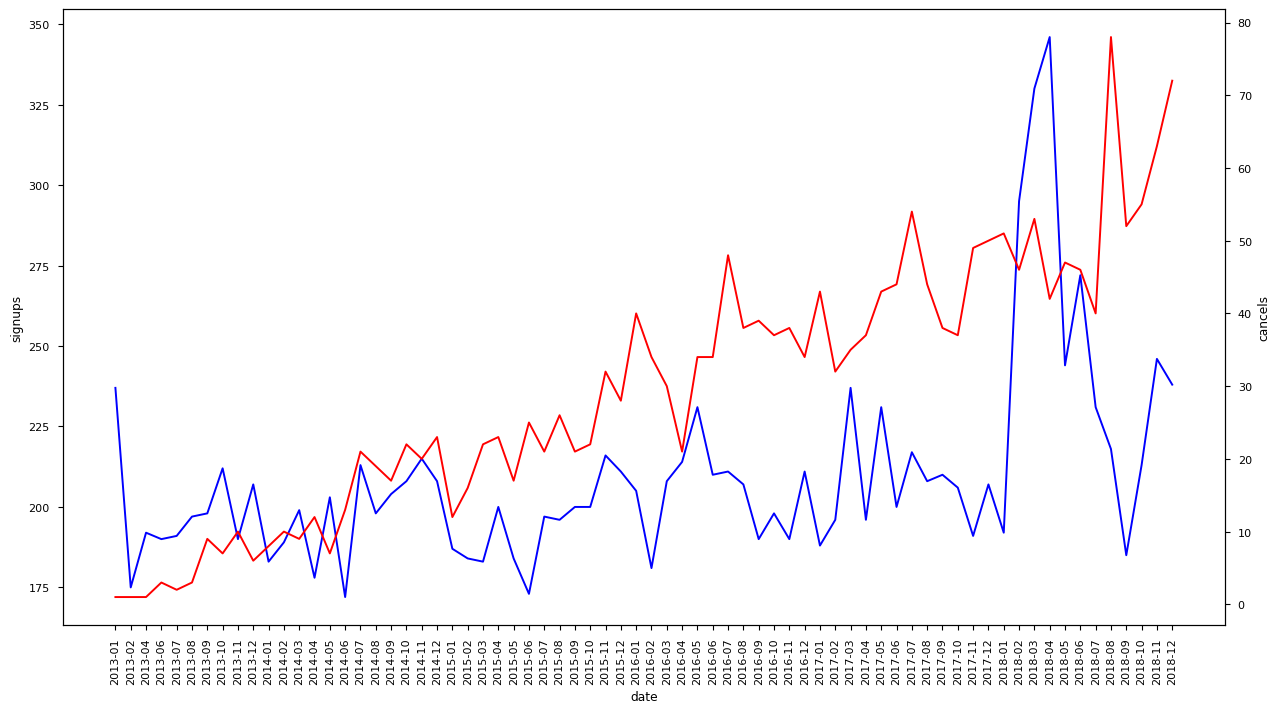

In [52]:
plt.figure(figsize=(15,8))
plt.xticks(rotation=90)
sns.lineplot(data=df_monthly, x="date", y="signups", color="b")
ax2=plt.twinx()
sns.lineplot(data=df_monthly, x="date", y="cancels", color="r", ax=ax2)

There is an increasing number of cancellations during the month of September, to check which group contributed, we do a cohort analysis

In [53]:
query="""
WITH tenure AS (
SELECT
    id,
    enrollment_date,
    cancellation_date,
    CASE
        WHEN cancellation_date IS NULL THEN 'Active'
        ELSE 'Cancelled'
    END AS status,
    (cancellation_year-enrollment_year)*12 + (cancellation_month-enrollment_month) AS 'tenure_month'
FROM signups
)

SELECT
    enrollment_date,
    tenure_month,
    COUNT(id) AS cancels,
    ROUND(100 * COUNT(id)/(SELECT COUNT(id) FROM tenure GROUP BY enrollment_date), 2) AS cancel_rate
FROM tenure
WHERE status='Cancelled'
GROUP BY enrollment_date, tenure_month
"""

df_churn=pd.read_sql_query(query, conn)
df_churn["enrollment_date"]=pd.to_datetime(df_churn["enrollment_date"]).dt.strftime('%Y-%m')
display(df_churn.head(10))
df_churn.describe()

,enrollment_date,tenure_month,cancels,cancel_rate
0,2013-01,0,1,1.0
1,2013-01,1,1,1.0
2,2013-01,5,2,3.0
3,2013-01,7,2,3.0
4,2013-01,8,4,6.0
5,2013-01,10,1,1.0
6,2013-01,12,1,1.0
7,2013-01,17,1,1.0
8,2013-01,18,2,3.0
9,2013-01,20,2,3.0


,tenure_month,cancels,cancel_rate
count,925.000000,925.000000,925.000000
mean,23.262703,2.234595,3.046486
std,17.056729,4.524117,7.336014
min,0.000000,1.000000,1.000000
25%,8.000000,1.000000,1.000000
50%,20.000000,1.000000,1.000000
75%,36.000000,1.000000,1.000000
max,71.000000,40.000000,64.000000


In [54]:
df_churn_pivot=pd.pivot_table(data=df_churn[df_churn["tenure_month"]<=12], index=["enrollment_date"], values=["cancels", "cancel_rate"], columns=["tenure_month"], aggfunc={"cancels": "sum", "cancel_rate": "sum"}, fill_value=0)
df_churn_pivot

cancel_rate                                      cancels     \
tenure_month             0  1  2  3  4  5  6  7   8  9  10 11 12      0  1    
enrollment_date                                                               
2013-01                   1  1  0  0  0  3  0  3   6  0  1  0  1       1  1   
2013-02                   0  0  0  0  0  0  0  1   3  0  1  0  0       0  0   
2013-03                   0  1  0  0  1  0  0  1   3  1  1  0  0       0  1   
2013-04                   0  0  1  0  0  0  1  1   1  0  1  0  1       0  0   
2013-05                   0  0  1  1  3  3  0  1   6  4  0  0  0       0  0   
2013-06                   0  0  0  0  0  0  1  0   8  0  0  0  0       0  0   
2013-07                   0  0  0  0  1  0  0  1   6  0  0  1  0       0  0   
2013-08                   0  1  0  4  0  0  0  0  11  1  0  0  0       0  1   
2013-09                   1  1  1  0  0  0  1  0   1  0  3  0  1       1  1   
2013-10                   0  1  1  1  0  3  0  3   8  0  0  1  1       0  1   
2013-11                   0  0  0  0  0  3  0  1  11  0  0  0  0       0  0   
2013-12                   0  1  0  0  0  0  1  0  19  1  1  1  0       0  1   
2014-01                   0  0  3  0  0  1  0  0  12  0  0  1  0       0  0   
2014-02                   0  0  1  0  0  3  0  0  17  0  1  0  0       0  0   
2014-03                   0  0  0  1  1  3  0  1  16  0  0  1  1       0  0   
2014-04                   1  0  0  0  0  0  3  1  22  1  0  0  0       1  0   
2014-05                   1  1  4  0  4  0  0  0   6  0  0  0  0       1  1   
2014-06                   0  1  0  0  0  0  0  1  14  1  0  0  0       0  1   
2014-07                   0  0  0  1  0  0  0  0  17  1  0  0  1       0  0   
2014-08                   1  0  0  3  0  0  0  0  19  0  0  0  1       1  0   
2014-09                   0  1  1  1  1  0  1  0  12  0  0  0  0       0  1   
2014-10                   0  3  3  1  1  0  0  0  17  0  0  1  0       0  2   
2014-11                   0  0  0  1  0  0  0  1  22  1  3  4  0       0  0   
2014-12                   0  0  0  0  1  0  0  0  30  0  0  0  0       0  0   
2015-01                   0  3  1  1  0  1  0  0  19  0  0  1  3       0  2   
2015-02                   0  3  0  0  1  0  0  0  17  0  0  0  1       0  2   
2015-03                   0  1  0  1  0  1  0  1  29  0  0  0  0       0  1   
2015-04                   0  1  4  0  0  1  0  0  25  0  1  0  1       0  1   
2015-05                   0  0  0  0  0  1  1  0  37  0  1  0  0       0  0   
2015-06                   0  0  0  0  0  1  1  3  16  0  0  0  0       0  0   
2015-07                   0  0  1  0  0  0  0  4  29  0  1  0  0       0  0   
2015-08                   0  0  1  0  0  0  1  0  17  1  0  0  4       0  0   
2015-09                   0  1  0  0  0  4  0  1  29  1  0  0  1       0  1   
2015-10                   0  0  1  1  1  0  0  0  30  0  0  0  0       0  0   
2015-11                   0  0  0  0  0  0  1  1  40  1  0  0  0       0  0   
2015-12                   0  0  0  0  0  0  0  1  37  3  3  0  1       0  0   
2016-01                   0  0  1  0  0  0  3  1  33  1  1  0  0       0  0   
2016-02                   0  0  0  0  0  0  0  0  30  4  1  1  0       0  0   
2016-03                   1  0  0  0  0  0  0  3  29  1  0  0  0       1  0   
2016-04                   0  3  1  3  0  0  0  1  25  0  0  0  1       0  2   
2016-05                   0  1  0  0  0  1  0  0  35  0  0  0  0       0  1   
2016-06                   0  0  1  0  1  0  0  1  29  1  0  0  0       0  0   
2016-07                   0  0  1  0  1  0  0  0  32  0  1  0  0       0  0   
2016-08                   0  0  0  1  0  1  0  1  27  1  0  0  1       0  0   
2016-09                   0  0  1  1  1  1  1  1  29  1  0  1  0       0  0   
2016-10                   0  0  0  1  0  1  0  0  37  1  1  0  1       0  0   
2016-11                   0  0  0  3  0  0  0  0  46  0  0  1  0       0  0   
2016-12                   1  0  1  0  0  0  0  0  40  1  1  0  0  

<Axes: xlabel='tenure_month', ylabel='enrollment_date'>

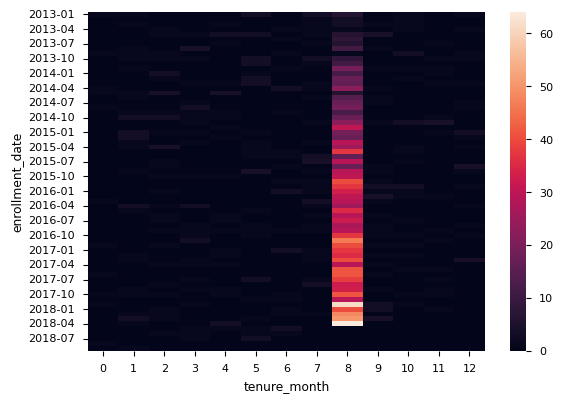

In [55]:
sns.heatmap(df_churn_pivot["cancel_rate"])

From the heat map, we see that many of the customers leave during their 8th month. Consequently, the peak in the line graph of cancels was due to 38 customers from the Dec-17 cohort who left last Aug 2018.

Now we check the number of flights contributed by each cohort during the summer of 2018.

In [56]:
query="""
SELECT
    enrollment_date,
    activity_date,
    SUM(total_flights) AS total_flights,
    ROUND(100 * SUM(total_flights) / (SELECT SUM(total_flights) FROM activity GROUP BY activity_date), 2) AS tot_flight_perc
FROM signups s
INNER JOIN activity a ON s.id = a.signup_id
GROUP BY enrollment_date, activity_date
"""

df_flights=pd.read_sql_query(query, conn)
df_flights["enrollment_date"]=pd.to_datetime(df_flights["enrollment_date"]).dt.strftime('%Y-%m')
df_flights["activity_date"]=pd.to_datetime(df_flights["activity_date"]).dt.strftime('%Y-%m')
display(df_flights.head(10))
df_flights.describe()

,enrollment_date,activity_date,total_flights,tot_flight_perc
0,2012-04,2017-01,50,0.0
1,2012-04,2017-02,44,0.0
2,2012-04,2017-03,49,0.0
3,2012-04,2017-04,43,0.0
4,2012-04,2017-05,58,0.0
5,2012-04,2017-06,64,0.0
6,2012-04,2017-07,81,0.0
7,2012-04,2017-08,74,0.0
8,2012-04,2017-09,57,0.0
9,2012-04,2017-10,42,0.0


,total_flights,tot_flight_perc
count,1667.000000,1667.000000
mean,300.274145,1.858428
std,219.666597,1.763065
min,5.000000,0.000000
25%,225.000000,1.000000
50%,272.000000,2.000000
75%,336.000000,2.000000
max,3112.000000,24.000000


<Axes: xlabel='activity_date', ylabel='total_flights'>

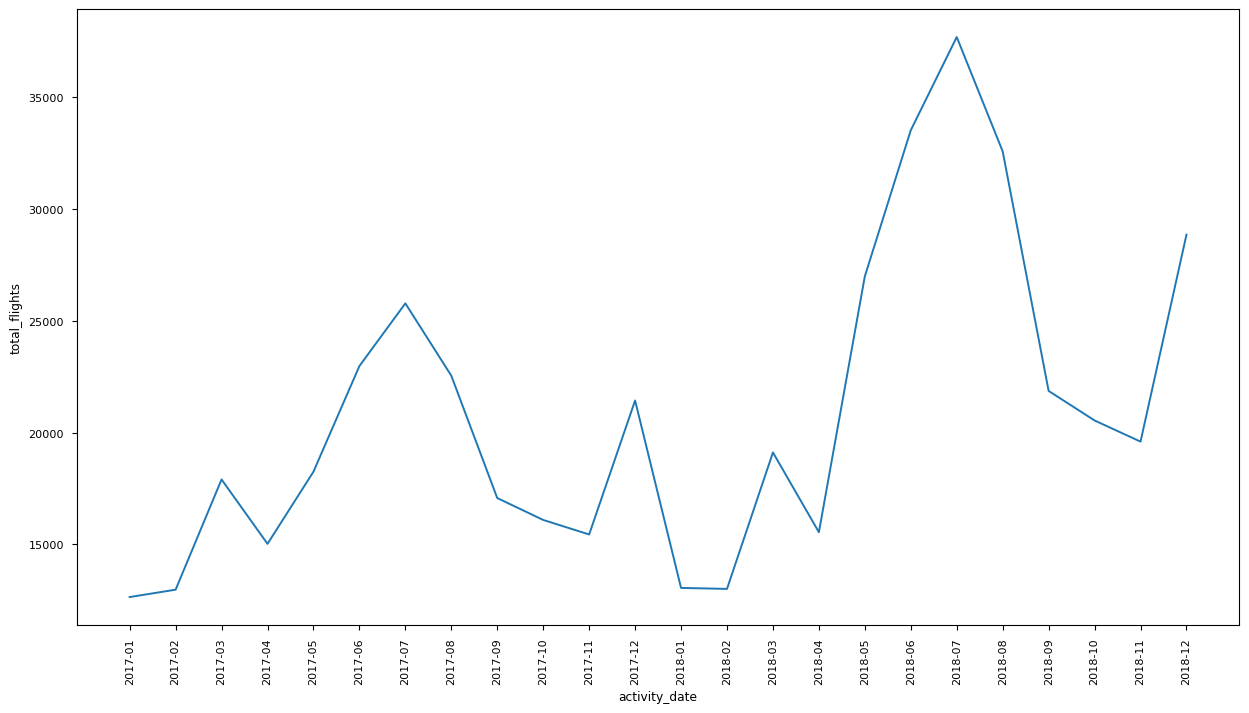

In [57]:
df_tot_flights=df_flights.groupby('activity_date').sum()[["total_flights"]]

plt.figure(figsize=(15,8))
plt.xticks(rotation=90)
sns.lineplot(data=df_tot_flights, x="activity_date", y="total_flights")

In [72]:
df_flights_pivot=pd.pivot_table(data=df_flights[df_flights["activity_date"]>'2017-12-01'], index=["enrollment_date"], columns=["activity_date"], values=["total_flights", "tot_flight_perc"], aggfunc={"total_flights": "sum", "tot_flight_perc": "sum"})
df_flights_pivot.tail(15)

tot_flight_perc                                          \
activity_date           2018-01 2018-02 2018-03 2018-04 2018-05 2018-06   
enrollment_date                                                           
2017-10                     1.0     1.0     2.0     2.0     2.0     3.0   
2017-11                     1.0     1.0     2.0     1.0     2.0     2.0   
2017-12                     1.0     1.0     2.0     1.0     2.0     3.0   
2018-01                     NaN     1.0     2.0     1.0     2.0     3.0   
2018-02                     NaN     0.0     3.0     2.0    15.0    21.0   
2018-03                     NaN     NaN     1.0     3.0    17.0    20.0   
2018-04                     NaN     NaN     NaN     0.0    16.0    21.0   
2018-05                     NaN     NaN     NaN     NaN     0.0     3.0   
2018-06                     NaN     NaN     NaN     NaN     NaN     1.0   
2018-07                     NaN     NaN     NaN     NaN     NaN     NaN   
2018-08                     NaN     NaN     NaN     NaN     NaN     NaN   
2018-09                     NaN     NaN     NaN     NaN     NaN     NaN   
2018-10                     NaN     NaN     NaN     NaN     NaN     NaN   
2018-11                     NaN     NaN     NaN     NaN     NaN     NaN   
2018-12                     NaN     NaN     NaN     NaN     NaN     NaN   

                                                                total_flights  \
activity_date   2018-07 2018-08 2018-09 2018-10 2018-11 2018-12       2018-01   
enrollment_date                                                                 
2017-10             3.0     2.0     2.0     1.0     1.0     2.0         230.0   
2017-11             3.0     2.0     2.0     1.0     1.0     2.0         206.0   
2017-12             3.0     3.0     2.0     1.0     1.0     2.0         210.0   
2018-01             3.0     2.0     2.0     1.0     1.0     2.0           NaN   
2018-02            20.0    18.0     6.0     6.0     5.0    12.0           NaN   
2018-03            21.0    20.0     6.0     6.0     6.0    11.0           NaN   
2018-04            24.0    20.0     8.0     7.0     6.0    13.0           NaN   
2018-05             4.0     3.0     2.0     2.0     2.0     3.0           NaN   
2018-06             4.0     4.0     2.0     2.0     2.0     3.0           NaN   
2018-07             0.0     3.0     2.0     2.0     2.0     3.0           NaN   
2018-08             NaN     0.0     2.0     2.0     2.0     3.0           NaN   
2018-09             NaN     NaN     0.0     1.0     2.0     2.0           NaN   
2018-10             NaN     NaN     NaN     0.0     2.0     2.0           NaN   
2018-11             NaN     NaN     NaN     NaN     0.0     3.0           NaN   
2018-12             NaN     NaN     NaN     NaN     NaN     0.0           NaN   

                                                                         \
activity_date   2018-02 2018-03 2018-04 2018-05 2018-06 2018-07 2018-08   
enrollment_date                                                           
2017-10           224.0   339.0   280.0   308.0   406.0   391.0   348.0   
2017-11           187.0   307.0   221.0   332.0   354.0   393.0   315.0   
2017-12           200.0   334.0   230.0   360.0   449.0   503.0   397.0   
2018-01           208.0   288.0   212.0   336.0   409.0   446.0   352.0   
2018-02           108.0   473.0   375.0  1932.0  2740.0  2644.0  2352.0   
2018-03             NaN   179.0   424.0  2156.0  2600.0  2704.0  2556.0   
2018-04             NaN     NaN   122.0  2136.0  2764.0  3112.0  2568.0   
2018-05             NaN     NaN     NaN    84.0   462.0   547.0   454.0   
2018-06             NaN     NaN     NaN     NaN   168.0   596.0   517.0   
2018-07             NaN     NaN     NaN     NaN     NaN    71.0   505.0   
2018-08             NaN     NaN     NaN     NaN     NaN     NaN    17.0   
2018-09             NaN     NaN     NaN     NaN     NaN     NaN     NaN   
2018-10             NaN     NaN     NaN     NaN     NaN     NaN     NaN   
2018-1

<Axes: xlabel='activity_date', ylabel='enrollment_date'>

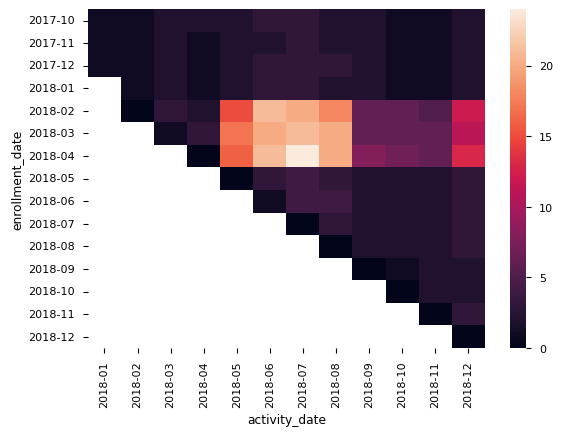

In [59]:
sns.heatmap(df_flights_pivot["tot_flight_perc"].tail(15))

We see that the cohorts who signed up during the promotion contributed the largest.

Now we check which groups signed-up during the promo

In [60]:
query="""
SELECT
    s.id,
    gender || ' & ' || education || ' & ' || marital_status AS 'segments',
    SUM(total_flights) AS total_flights,
    SUM(distance) AS total_distance,
    enrollment_date,
    cancellation_date,
    (cancellation_year-enrollment_year)*12 + (cancellation_month-enrollment_month) AS 'tenure_month',
    CASE
        WHEN cancellation_date IS NULL THEN 'Active'
        ELSE 'Cancelled'
    END AS 'status',
    salary
FROM signups s
INNER JOIN activity a ON s.id = a.signup_id
GROUP BY s.id
"""

df_demo=pd.read_sql_query(query, conn)
df_demo["enrollment_date"]=pd.to_datetime(df_demo["enrollment_date"]).dt.strftime('%Y-%m')
df_demo["cancellation_date"]=pd.to_datetime(df_demo["cancellation_date"]).dt.strftime('%Y-%m')
df_demo

,id,segments,total_flights,total_distance,enrollment_date,cancellation_date,tenure_month,status,salary
0,100018,Female & Bachelor & Married,46,81190,2016-08,NaN,NaN,Active,92552.0
1,100102,Male & Bachelor & Single,51,68918,2013-03,NaN,NaN,Active,NaN
2,100140,Female & Bachelor & Divorced,47,72856,2016-07,NaN,NaN,Active,NaN
3,100214,Male & Bachelor & Married,22,38236,2015-08,NaN,NaN,Active,63253.0
4,100272,Female & Bachelor & Divorced,37,54997,2014-01,NaN,NaN,Active,91163.0
...,...,...,...,...,...,...,...,...,...
15123,999891,Female & Bachelor & Married,0,0,2016-05,2017-01,8.0,Cancelled,75616.0
15124,999902,Male & Bachelor & Married,50,83725,2014-05,NaN,NaN,Active,NaN
15125,999940,Female & Bachelor & Married,18,28275,2017-07,NaN,NaN,Active,47670.0
15126,999982,Male & Bachelor & Married,6,8323,2018-07,NaN,NaN,Active,NaN


In [61]:
df_promo_demo=df_demo[(df_demo["enrollment_date"]>"2018-01-01") & (df_demo["enrollment_date"]<"2018-05-01")]
df_promo_demo_pivot=df_promo_demo.groupby("segments").count()[["id"]].sort_values(by="id", ascending=False)
df_promo_demo_pivot

,id
segments,
Male & Bachelor & Married,310
Female & Bachelor & Married,290
Male & Bachelor & Single,145
Female & Bachelor & Single,142
Male & Bachelor & Divorced,83
Female & Bachelor & Divorced,69
Male & High School or Below & Married,20
Female & High School or Below & Married,15
Female & Doctor & Married,12


In [62]:
df_demo_pivot=pd.pivot_table(data=df_demo, index=["enrollment_date"], values=["id"], columns=["segments"], aggfunc="count",fill_value=0)
df_demo_pivot.tail(15)

id                              \
segments        Female & Bachelor & Divorced Female & Bachelor & Married   
enrollment_date                                                            
2017-10                                    9                          63   
2017-11                                   17                          59   
2017-12                                    6                          56   
2018-01                                   17                          48   
2018-02                                   18                          81   
2018-03                                   24                          71   
2018-04                                   15                          93   
2018-05                                   12                          45   
2018-06                                   23                          53   
2018-07                                   17                          55   
2018-08                                   15                          62   
2018-09                                   12                          39   
2018-10                                   15                          36   
2018-11                                   14                          39   
2018-12                                    4                          13   

                                                                       \
segments        Female & Bachelor & Single Female & Doctor & Divorced   
enrollment_date                                                         
2017-10                                 23                          0   
2017-11                                 27                          0   
2017-12                                 34                          0   
2018-01                                 18                          0   
2018-02                                 41                          1   
2018-03                                 32                          2   
2018-04                                 41                          0   
2018-05                                 28                          0   
2018-06                                 50                          0   
2018-07                                 19                          2   
2018-08                                 32                          3   
2018-09                                 27                          2   
2018-10                                 22                          2   
2018-11                                 19                          0   
2018-12                                  5                          0   

                                                                    \
segments        Female & Doctor & Married Female & Doctor & Single   
enrollment_date                                                      
2017-10                                 3                        0   
2017-11                                 0                        0   
2017-12                                 2                        1   
2018-01                                 5                        1   
2018-02                                 1                        2   
2018-03                                 5                        0   
2018-04                                 4                        0   
2018-05                                 2                        1   
2018-06                                 2                        0   
2018-07                                 3                        0   
2018-08                                 3                        0   
2018-09                                 2                        2   
2018-10                                 1                        1   
2018-11                                 2                        0   
2018-12                                 0                        0   

                                                          \
segments        Female & High School 

<Axes: xlabel='None-segments', ylabel='enrollment_date'>

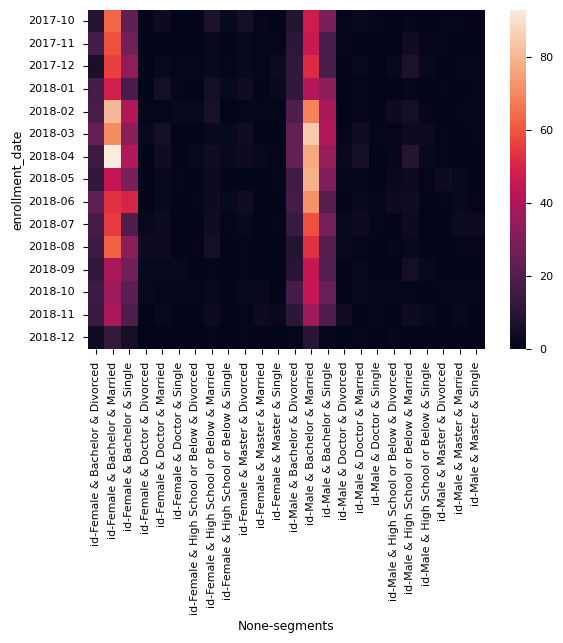

In [63]:
sns.heatmap(df_demo_pivot.tail(15))

In [64]:
df_promo_cancel=df_demo[(df_demo["enrollment_date"]>"2018-01-01") & (df_demo["enrollment_date"]<"2018-05-01") & (df_demo["status"]=="Cancelled")]
df_promo_cancel_pivot=df_promo_cancel.groupby("segments").count()[["id"]].sort_values(by="id", ascending=False)
df_promo_cancel_pivot.rename(columns={"id":"cancel"}, inplace=True)
df_promo_cancel_all=pd.concat([df_promo_cancel_pivot,df_promo_demo_pivot], axis=1)
df_promo_cancel_all['perc']=100*df_promo_cancel_all["cancel"]/df_promo_cancel_all["id"]
df_promo_cancel_all.sort_values(by='perc', ascending=False)

,cancel,id,perc
segments,,,
Male & Doctor & Single,1.0,1,100.000000
Female & Doctor & Divorced,2.0,3,66.666667
Female & Master & Married,2.0,3,66.666667
Male & Master & Married,1.0,3,33.333333
Female & Master & Divorced,2.0,8,25.000000
Female & Bachelor & Divorced,10.0,69,14.492754
Male & High School or Below & Divorced,1.0,7,14.285714
Male & Bachelor & Married,36.0,310,11.612903
Male & Bachelor & Single,15.0,145,10.344828


how can we prevent customer churn and how can we segment our customers based on their behavior - RFM

Recency - max date
Frequency - number of flights
Monetary - distance

source: https://guillaume-martin.github.io/rfm-segmentation-with-python.html

In [65]:
query="""
WITH flights AS (
SELECT
    signup_id,
    max(activity_date) AS 'latest_flight',
    SUM(total_flights) AS tot_flights,
    SUM(distance) AS total_distance
FROM activity a
INNER JOIN signups s ON a.signup_id = s.id
WHERE cancellation_date IS NULL
GROUP BY signup_id
),

quantiles AS (
SELECT
    *,
    NTILE(5) OVER(ORDER BY latest_flight ASC) AS r,
    NTILE(5) OVER(ORDER BY tot_flights ASC) AS f,
    NTILE(5) OVER(ORDER BY total_distance ASC) AS m
FROM flights
)

SELECT
    signup_id,
    r*10 + f AS rf,
    r*100 + f*10 + m AS rfm,
    CASE
        WHEN f = 5 AND r IN (1,2) THEN 'Cant Lose Them'
        WHEN f IN (3,4) AND r IN (1,2) THEN 'At Risk'
        WHEN f IN (1,2) AND r IN (1,2) THEN 'Hibernating'
        WHEN f IN (4,5) AND r IN (3,4) THEN 'Loyal Customers'
        WHEN f = 3 AND r = 3 THEN 'Needs Attention'
        WHEN f IN (1,2) AND r = 3 THEN 'About to Sleep'
        WHEN f IN (4,5) AND r = 5 THEN 'Champions'
        WHEN f IN (2,3) AND r IN (4,5) THEN 'Potential Loyalists'
        WHEN f = 1 AND r = 4 THEN 'Promising'
        WHEN f = 1 AND r = 5 THEN 'New Customers'
        ELSE 'Same'
    END AS rfm_segments
FROM quantiles
"""
df_rfm=pd.read_sql_query(query, conn)
df_rfm

,signup_id,rf,rfm,rfm_segments
0,421310,11,111,Hibernating
1,589818,11,111,Hibernating
2,996301,11,111,Hibernating
3,583271,11,111,Hibernating
4,123830,11,111,Hibernating
...,...,...,...,...
14005,464187,55,555,Champions
14006,110065,55,555,Champions
14007,732304,55,555,Champions
14008,813455,55,555,Champions


,signup_id
rfm_segments,
About to Sleep,2802
Champions,2802
Hibernating,2756
At Risk,2054
Potential Loyalists,1771
Loyal Customers,1031
Cant Lose Them,794


<Axes: xlabel='rfm_segments', ylabel='signup_id'>

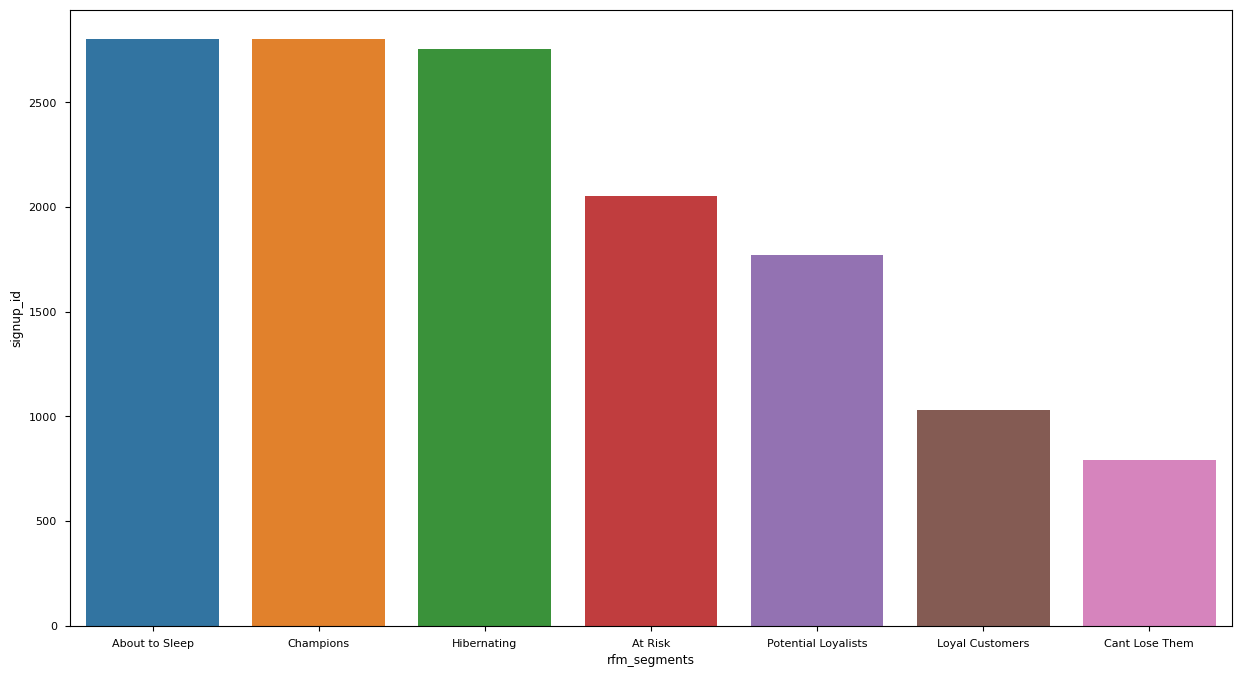

In [66]:
df_rfm_gb=df_rfm.groupby("rfm_segments").count()[["signup_id"]].sort_values("signup_id", ascending=False)

display(df_rfm_gb)
plt.figure(figsize=(15,8))
sns.barplot(df_rfm_gb, x=df_rfm_gb.index, y="signup_id")

In [67]:
query="""
SELECT
    id as 'signup_id',
    loyalty_card,
    gender,
    education,
    marital_status,
    gender || ' & ' || education || ' & ' || marital_status AS 'segments',
    city,
    province,
    city || ", " || province AS 'location'
FROM signups
WHERE cancellation_date IS NULL
"""

df_active=pd.read_sql_query(query, conn)
df_active

,signup_id,loyalty_card,gender,education,marital_status,segments,city,province,location
0,480934,Star,Female,Bachelor,Married,Female & Bachelor & Married,Toronto,Ontario,"Toronto, Ontario"
1,549612,Star,Male,Bachelor,Divorced,Male & Bachelor & Divorced,Edmonton,Alberta,"Edmonton, Alberta"
2,608370,Star,Male,Bachelor,Single,Male & Bachelor & Single,Toronto,Ontario,"Toronto, Ontario"
3,530508,Star,Male,Bachelor,Married,Male & Bachelor & Married,Hull,Quebec,"Hull, Quebec"
4,193662,Star,Male,Bachelor,Married,Male & Bachelor & Married,Whitehorse,Yukon,"Whitehorse, Yukon"
...,...,...,...,...,...,...,...,...,...
14665,900501,Star,Male,Bachelor,Single,Male & Bachelor & Single,Sudbury,Ontario,"Sudbury, Ontario"
14666,823768,Star,Female,Bachelor,Married,Female & Bachelor & Married,Vancouver,British Columbia,"Vancouver, British Columbia"
14667,680886,Star,Female,Bachelor,Married,Female & Bachelor & Married,Regina,Saskatchewan,"Regina, Saskatchewan"
14668,776187,Star,Male,Bachelor,Single,Male & Bachelor & Single,Vancouver,British Columbia,"Vancouver, British Columbia"


In [68]:
df_active_rfm=df_active.merge(df_rfm, on="signup_id", how="inner")
df_active_rfm

,signup_id,loyalty_card,gender,education,marital_status,segments,city,province,location,rf,rfm,rfm_segments
0,480934,Star,Female,Bachelor,Married,Female & Bachelor & Married,Toronto,Ontario,"Toronto, Ontario",43,433,Potential Loyalists
1,549612,Star,Male,Bachelor,Divorced,Male & Bachelor & Divorced,Edmonton,Alberta,"Edmonton, Alberta",55,555,Champions
2,608370,Star,Male,Bachelor,Single,Male & Bachelor & Single,Toronto,Ontario,"Toronto, Ontario",43,433,Potential Loyalists
3,530508,Star,Male,Bachelor,Married,Male & Bachelor & Married,Hull,Quebec,"Hull, Quebec",43,433,Potential Loyalists
4,193662,Star,Male,Bachelor,Married,Male & Bachelor & Married,Whitehorse,Yukon,"Whitehorse, Yukon",55,555,Champions
...,...,...,...,...,...,...,...,...,...,...,...,...
14005,900501,Star,Male,Bachelor,Single,Male & Bachelor & Single,Sudbury,Ontario,"Sudbury, Ontario",12,122,Hibernating
14006,823768,Star,Female,Bachelor,Married,Female & Bachelor & Married,Vancouver,British Columbia,"Vancouver, British Columbia",43,433,Potential Loyalists
14007,680886,Star,Female,Bachelor,Married,Female & Bachelor & Married,Regina,Saskatchewan,"Regina, Saskatchewan",55,555,Champions
14008,776187,Star,Male,Bachelor,Single,Male & Bachelor & Single,Vancouver,British Columbia,"Vancouver, British Columbia",55,554,Champions


In [69]:
pd.pivot_table(data=df_active_rfm, index=["rfm_segments"], values=["signup_id"], columns=["province"], aggfunc="count")

signup_id                                          \
province              Alberta British Columbia Manitoba New Brunswick   
rfm_segments                                                            
About to Sleep            170              752      105           106   
At Risk                   129              520       65            79   
Cant Lose Them             42              215       39            31   
Champions                 160              743      103           118   
Hibernating               155              755      111           100   
Loyal Customers            53              279       39            37   
Potential Loyalists        97              456       68            72   

                                                                   \
province            Newfoundland and Labrador Nova Scotia Ontario   
rfm_segments                                                        
About to Sleep                             44          88     879   
At Risk                                    35          69     677   
Cant Lose Them                             17          20     250   
Champions                                  39          87     882   
Hibernating                                37          87     877   
Loyal Customers                            15          31     348   
Potential Loyalists                        22          55     612   

                                                                    
province            Prince Edward Island Quebec Saskatchewan Yukon  
rfm_segments                                                        
About to Sleep                         8    573           59    18  
At Risk                               11    398           56    15  
Cant Lose Them                         3    154           17     6  
Champions                             14    563           69    24  
Hibernating                            9    538           70    17  
Loyal Customers                        1    200           27     1  
Potential Loyalists                    4    325           45    15

In [70]:
pd.pivot_table(data=df_active_rfm, index=["rfm_segments"], values=["signup_id"], columns=["segments"], aggfunc="count")

signup_id                              \
segments            Female & Bachelor & Divorced Female & Bachelor & Married   
rfm_segments                                                                   
About to Sleep                               188                         678   
At Risk                                      105                         562   
Cant Lose Them                                52                         185   
Champions                                    142                         695   
Hibernating                                  196                         702   
Loyal Customers                               61                         259   
Potential Loyalists                          103                         467   

                                                                           \
segments            Female & Bachelor & Single Female & Doctor & Divorced   
rfm_segments                                                                
About to Sleep                             323                         12   
At Risk                                    276                         13   
Cant Lose Them                             115                          4   
Champions                                  340                         16   
Hibernating                                374                         19   
Loyal Customers                            130                          8   
Potential Loyalists                        202                          8   

                                                                        \
segments            Female & Doctor & Married Female & Doctor & Single   
rfm_segments                                                             
About to Sleep                             40                        3   
At Risk                                    23                        8   
Cant Lose Them                             11                        4   
Champions                                  34                       10   
Hibernating                                32                        7   
Loyal Customers                            18                        2   
Potential Loyalists                        28                        4   

                                                              \
segments            Female & High School or Below & Divorced   
rfm_segments                                                   
About to Sleep                                             9   
At Risk                                                    7   
Cant Lose Them                                             4   
Champions                                                 13   
Hibernating                                                7   
Loyal Customers                                            1   
Potential Loyalists                                        7   

                                                             \
segments            Female & High School or Below & Married   
rfm_segments                                                  
About to Sleep                                           47   
At Risk                                                  34   
Cant Lose Them                                           16   
Champions                                                46   
Hibernating                                              45   
Loyal Customers                                          19   
Potential Loyalists                                      25   

                                                            \
segments            Female & High School or Below & Single   
rfm_segments                                                 
About to Sleep                                          15   
At Risk                                                  9   
Cant Lose Them                                           4   
Champions                                               11   
Hibernating         

In [71]:
conn.close()